___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 4. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 5. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pprint import pprint 
from scipy.stats import chi2_contingency
from sklearn.metrics import jaccard_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HR_Dataset.csv')
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 1. Exploratory Data Analysis

In [3]:
df.shape

(14999, 10)

We have 10 columns and 14999 rows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# remove space from column name and to lowercase to match the rest
df.rename(columns={'Departments ': 'departments'}, inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


We have 3 encoded categorical columns [Work_accident, left, promotion_last_5years]

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns # cat features
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
pprint(cat_cols)
print("Numerical Variables:")
pprint(num_cols)

Categorical Variables:
Index(['departments', 'salary'], dtype='object')
Numerical Variables:
['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']


In [8]:
# checking duplicated values
df.duplicated().sum()

3008

In [9]:
# dropping them
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
# checking null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [11]:
# taking a look at departments column
df['departments'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: departments, dtype: int64

## 2. Data Visualization

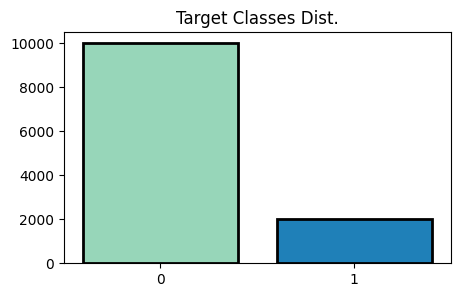

In [12]:
c = df['left'].value_counts()

# visualizing our target distribution
plt.figure(figsize=(5, 3))
sns.barplot(x=c.index, y=c.values,
            saturation=1, edgecolor='k',
            linewidth=2, palette='YlGnBu')
plt.title(f'Target Classes Dist.')
plt.show()

The target classes are not balanced, we must handle the imbalnced issue. <br>
Common approaches:<br>
•	Focus on recall, precision, F1 scores for each class or (macro average)<br>
•	Use the class weight parameter to assign higher weights for the minority class<br>
During the modeling process we will try to improve the performance for class 1 since it has more value in this business problem since employees churn will introduce unexpected costs.

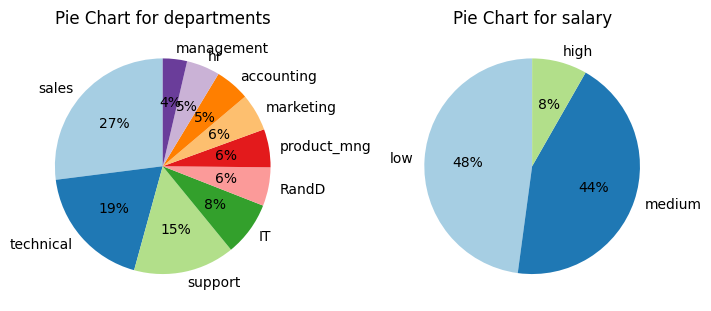

In [13]:
#columns with non-numerical data types
non_numerical_columns = df.select_dtypes(exclude='number').columns 

plt.figure(figsize=(18, 15))

for i, column in enumerate(non_numerical_columns):
    plt.subplot(2, 5, i + 1)

    value_counts = df[column].value_counts()

    plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%', 
            startangle=90, colors=sns.color_palette('Paired'))
    plt.title(f'Pie Chart for {column}')

plt.tight_layout()
plt.show()

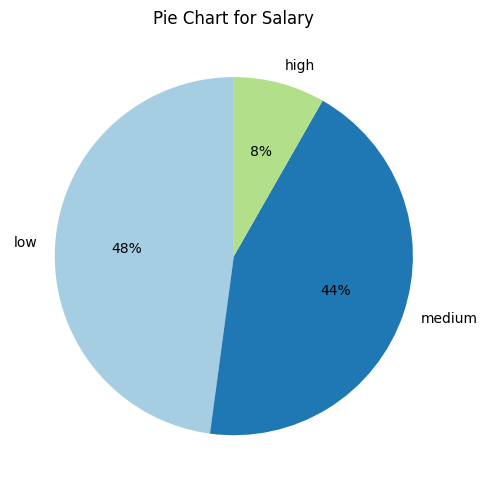

In [14]:
plt.figure(figsize=(8, 5))
value_counts = df['salary'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%', 
            startangle=90, colors=sns.color_palette('Paired'))
plt.title(f'Pie Chart for Salary')
plt.tight_layout()
plt.show()

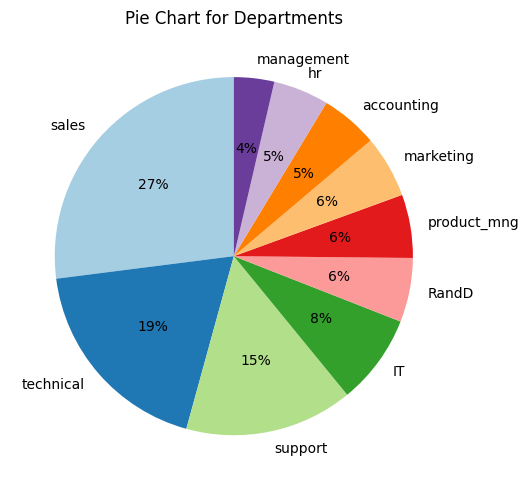

In [15]:
plt.figure(figsize=(8, 5))
value_counts = df['departments'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%', 
            startangle=90, colors=sns.color_palette('Paired'))
plt.title(f'Pie Chart for Departments')
plt.tight_layout()
plt.show()

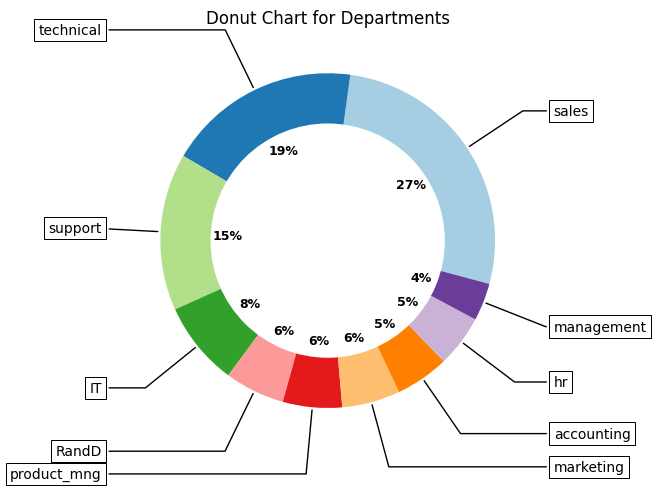

In [16]:
# code from matplotlib docs: 
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

value_counts = df['departments'].value_counts()

wedges, texts, autotexts = ax.pie(value_counts, wedgeprops=dict(width=0.5), startangle=-15,
                                 autopct='%1.0f%%', colors=plt.cm.Paired.colors,labeldistance=0.7)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for j, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(value_counts.index[j], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, **kw)

plt.setp(autotexts, size=9, weight='bold')
plt.setp(texts, size=10)

ax.set_title(f"Donut Chart for Departments")
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))  

plt.tight_layout()
plt.show()

In [17]:
# storing numerical without encoded columns
cols = ['satisfaction_level',
        'last_evaluation',
        'number_project',
        'average_montly_hours',
        'time_spend_company',
        'Work_accident',
        'promotion_last_5years']

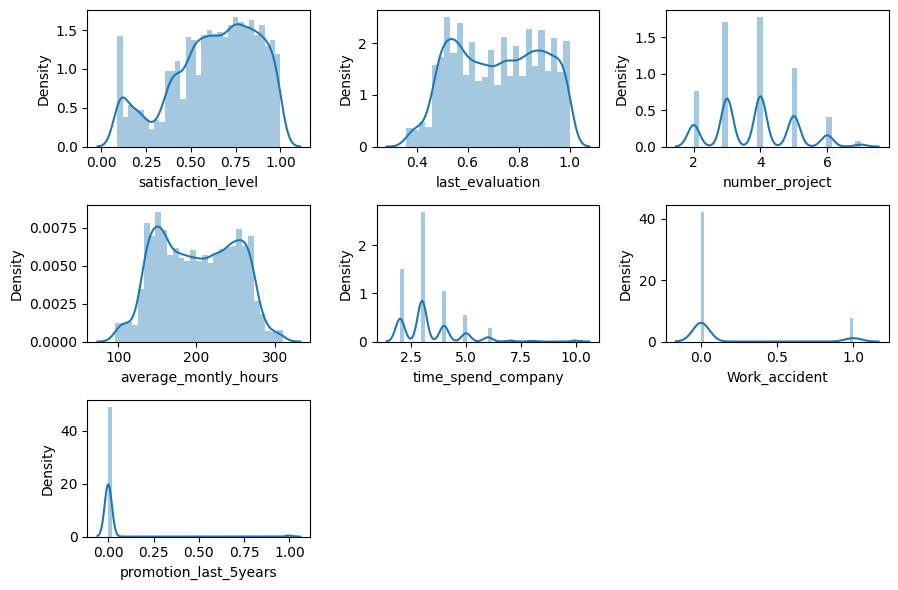

In [18]:
plt.figure(figsize=(9, 6))
for i, column in enumerate(df[cols] , 1):
    plt.subplot(3,3,i)
    sns.distplot(df[column])
    plt.tight_layout()

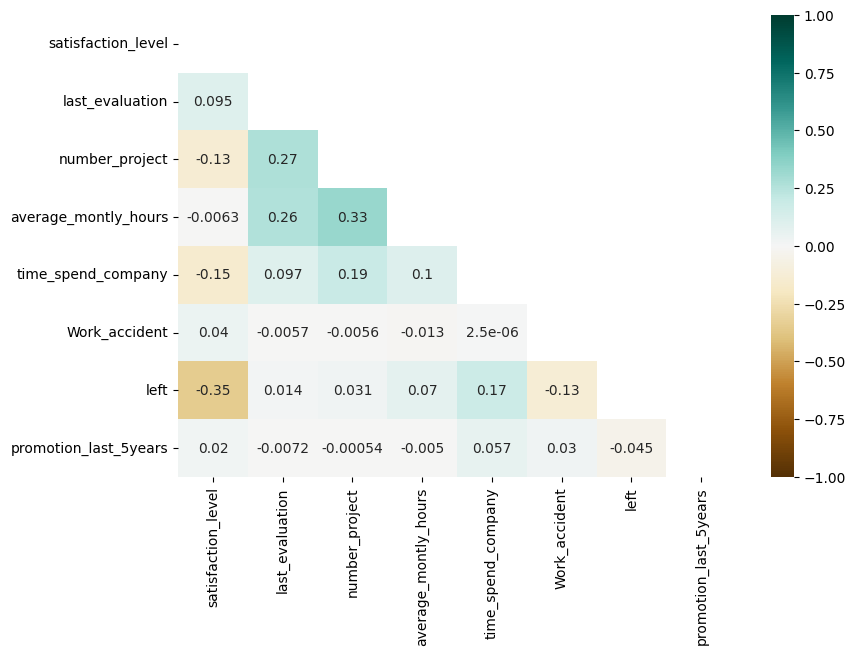

In [19]:
plt.figure(figsize=(9, 6))
mask = np.triu(np.ones_like(df.corr())) #mask for the upper half
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');

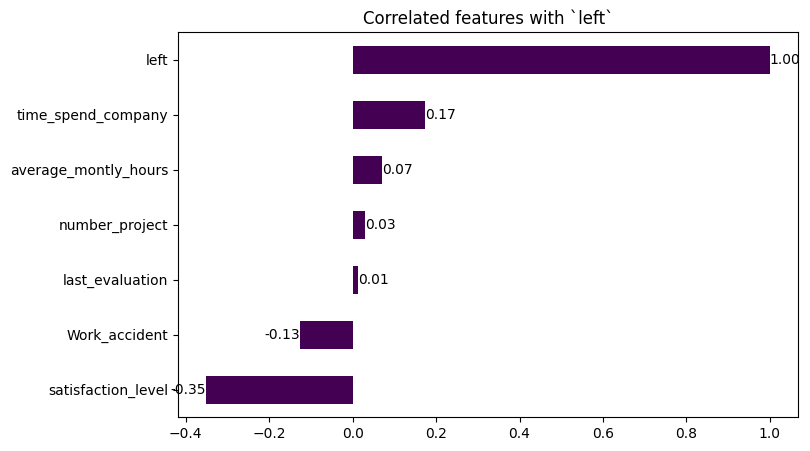

In [20]:
#correlated features with `left` vs numaric columns
plt.figure(figsize=(8, 5))
ax = df.corr()['left'][:-1].sort_values().plot(kind='barh', colormap='viridis')
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.title('Correlated features with `left`');


-  `>` .5 or < -.5       high association

- .3 to .5 or -.3 to -.5  moderate association

- .1 to .3 or -.1 to -.3  low association

- -1 to 1   little if any association

Cramer’s V for categorical columns

In [21]:
cat = ['Work_accident',
       'promotion_last_5years',
       'departments',
       'salary',
       'number_project',
       'time_spend_company',
       ]

In [22]:
"""
This segment of code loops through the cat list above
to calculates Crammar's v and store it for later comparison
"""
v_values = []

for column in cat:
    tb = pd.crosstab(df[column], df['left']) 
    chi2, _, _, _ = chi2_contingency(tb)
    n = tb.sum().sum()
    v = np.sqrt(chi2 / (n * min(tb.shape) - 1))
    v_values.append((column, v))

v_values.sort(key=lambda x: x[1], reverse=True)

table = pd.DataFrame(v_values, 
                     columns=['column', 'v'])

In [23]:
table.style.background_gradient(cmap='Blues')

,column,v
0,number_project,0.393293
1,time_spend_company,0.232700
2,Work_accident,0.088479
3,salary,0.085476
4,promotion_last_5years,0.030964
5,departments,0.029492


Cramér's V is used to measure of association between two categorical variables. It's based on the chi-square and is mostly used to assess the strength of association between two categorical variables.

Jaccard coefficient

In [24]:
df['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [25]:
copy = df.copy()
copy['salary'] = copy['salary'].map({
    'low': 0,
    'medium': 5261,
    'high':2
})

cat.remove('departments') 
# no order between them so we can't encode them

In [26]:
"""
This segment of code loops through the cat list above
to calculates jaccared values and store it for later comparison
"""

jaccard_values = []

for column in cat:
    jaccard = jaccard_score(copy['left'], copy[column], average='weighted')
    jaccard_values.append((column, jaccard))

jaccard_values.sort(key=lambda x: x[1], reverse=True)

table2 = pd.DataFrame(jaccard_values, 
    columns=['column', 'jaccard coefficient'])

In [27]:
table2.style.background_gradient(cmap='Blues')

,column,jaccard coefficient
0,promotion_last_5years,0.682988
1,Work_accident,0.583863
2,salary,0.340778
3,number_project,0.000000
4,time_spend_company,0.000000


Jaccard values is a measure of similarity between categorical variables the closer to 1 is better.

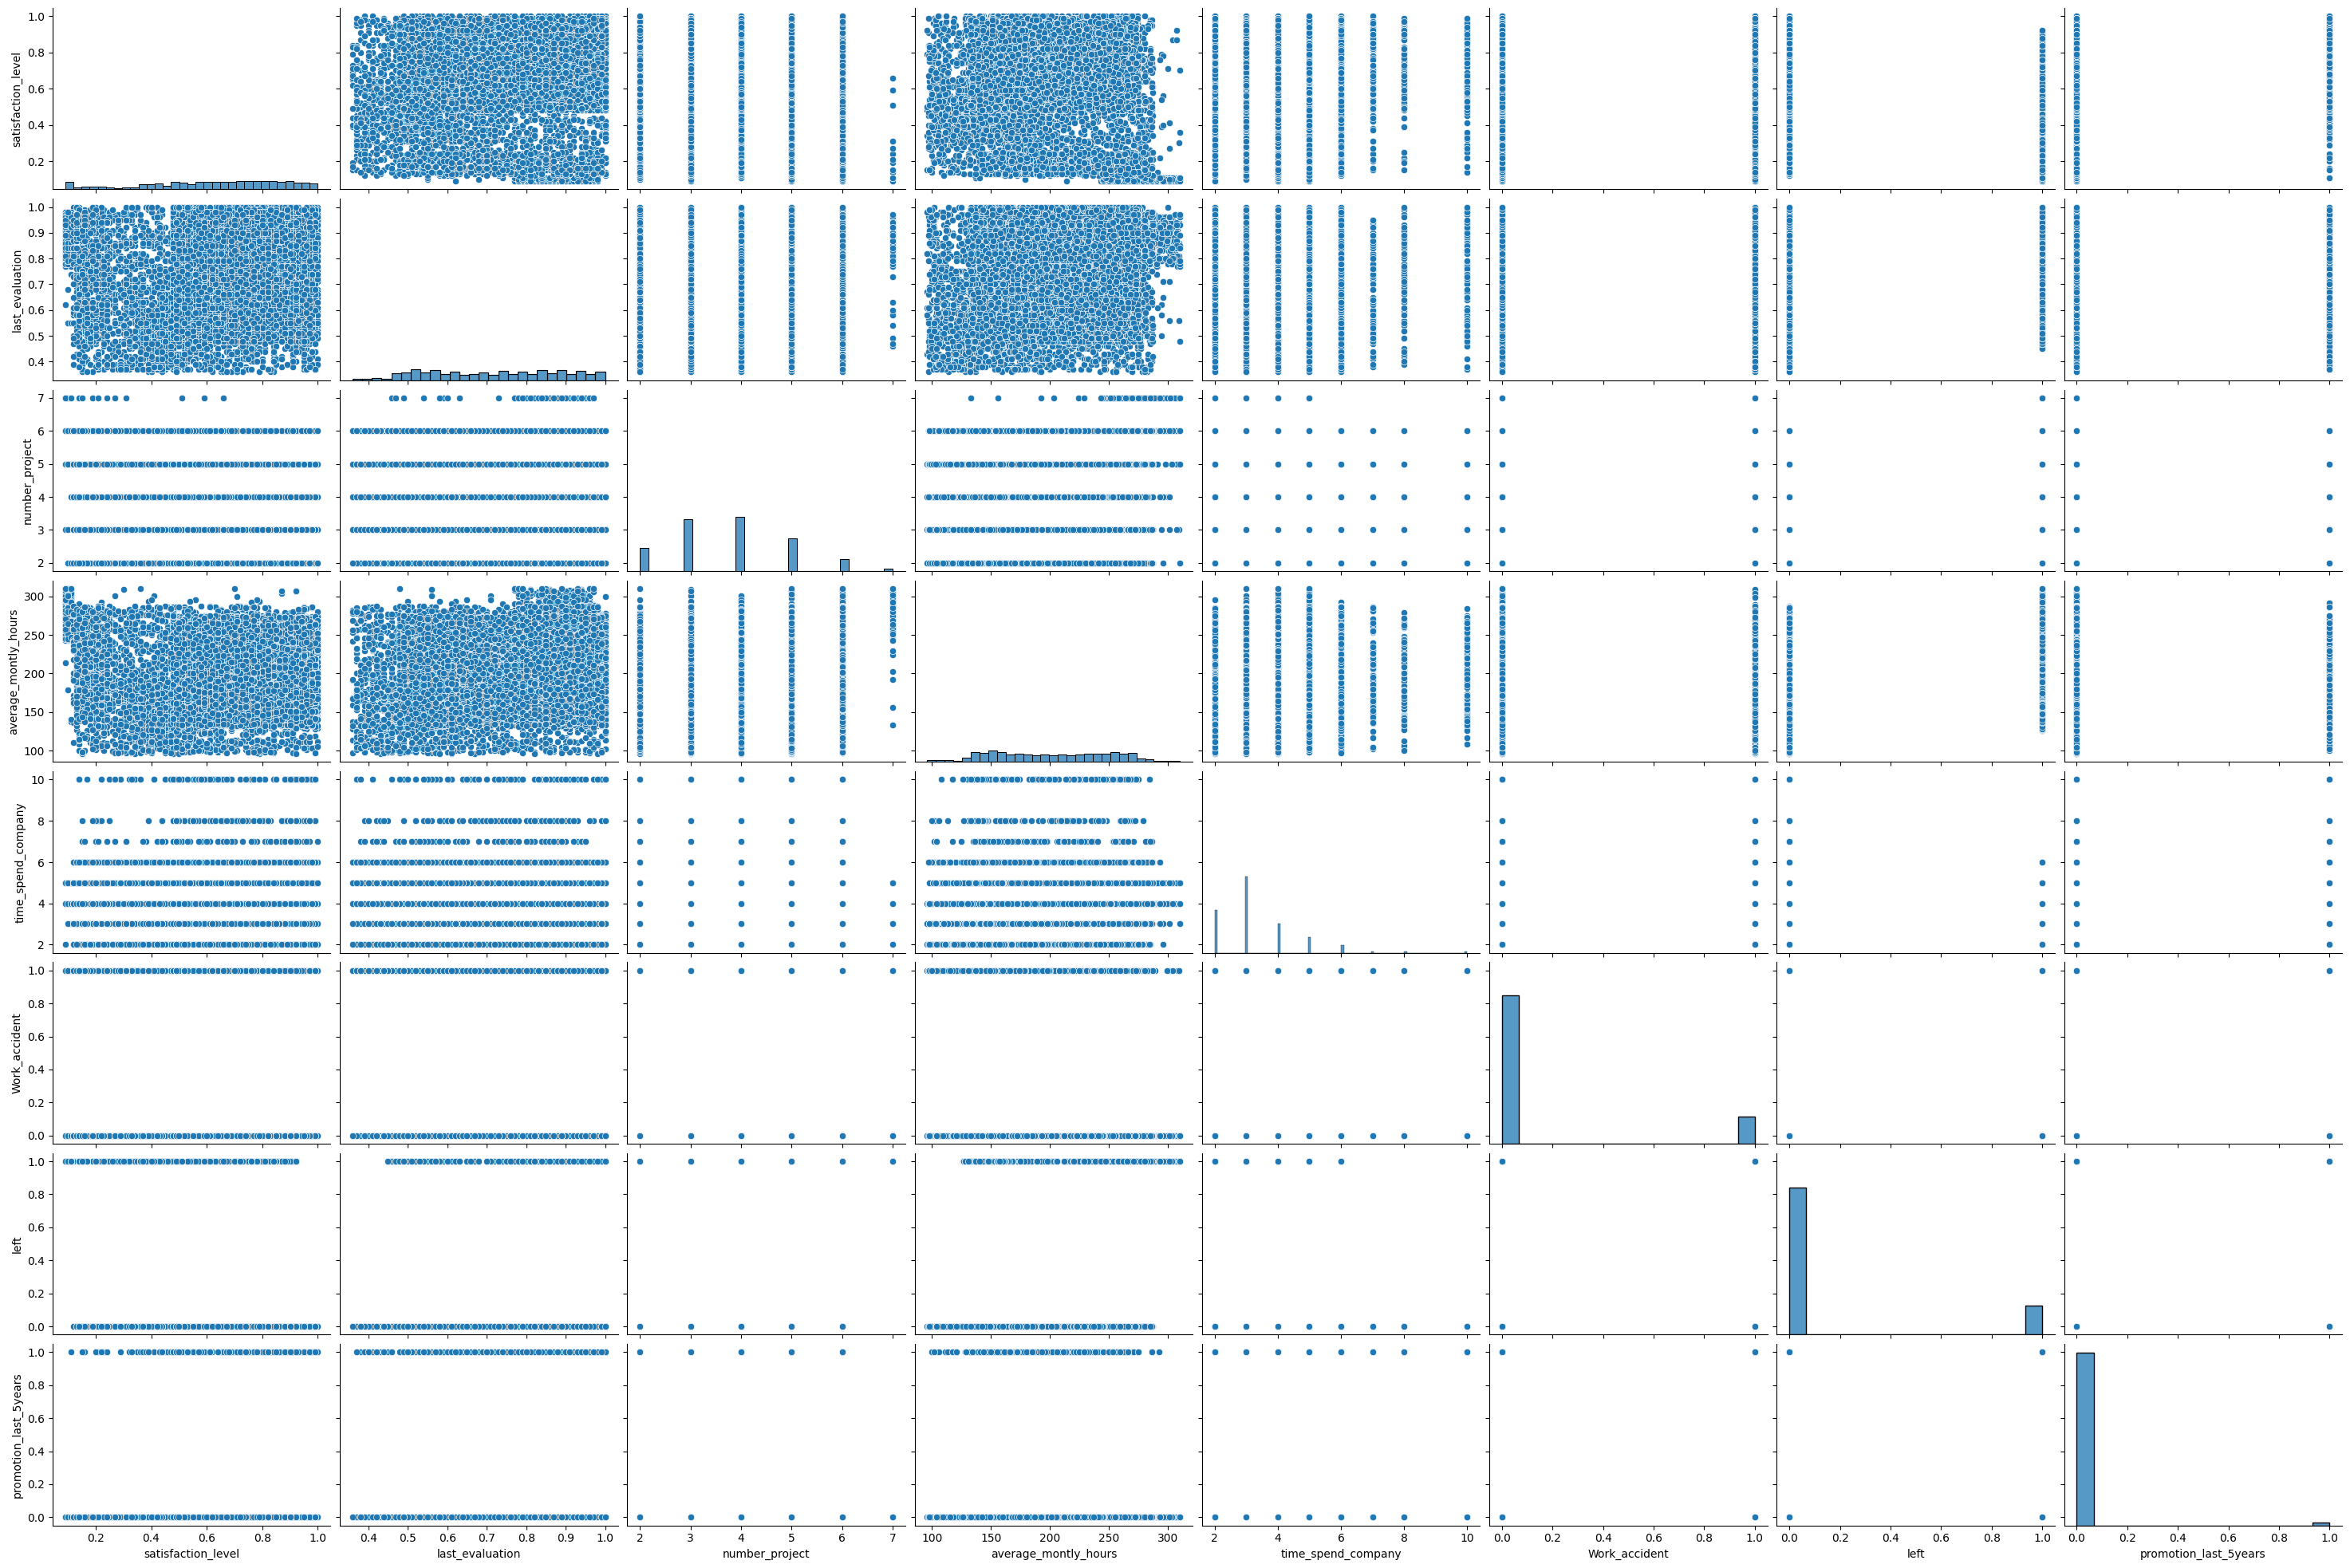

In [28]:
sns.pairplot(df[num_cols] ,aspect=1.5);

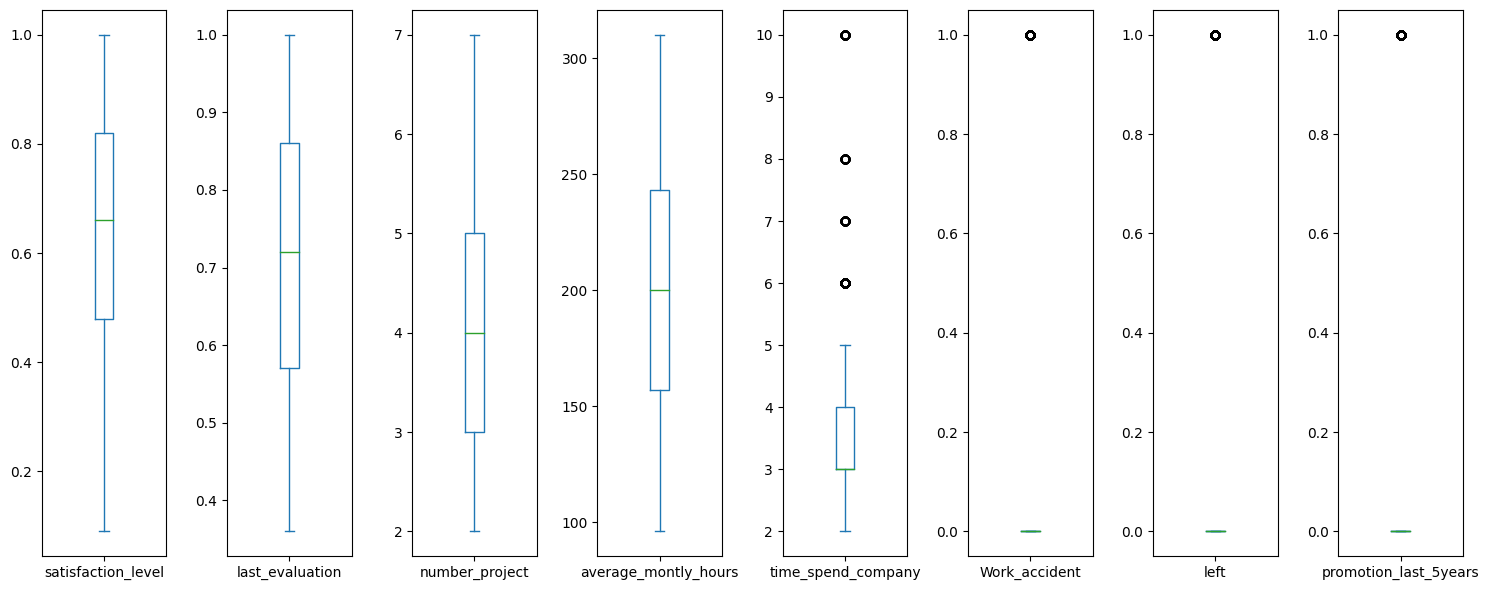

In [29]:
df.plot( kind="box", subplots=True, figsize=(15, 6))
plt.tight_layout();

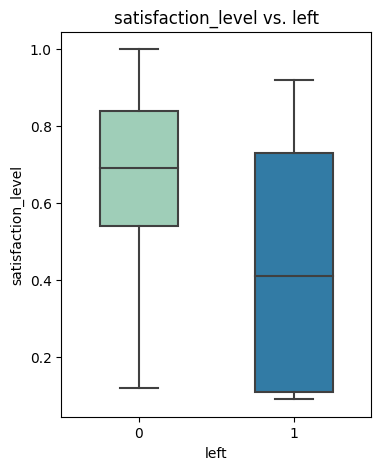

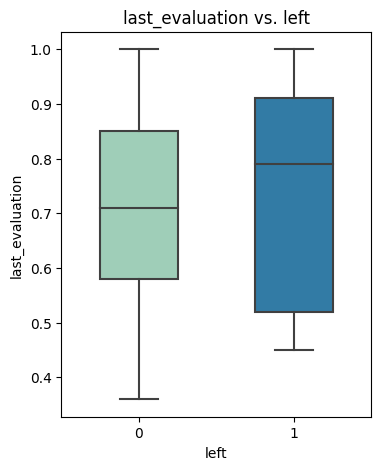

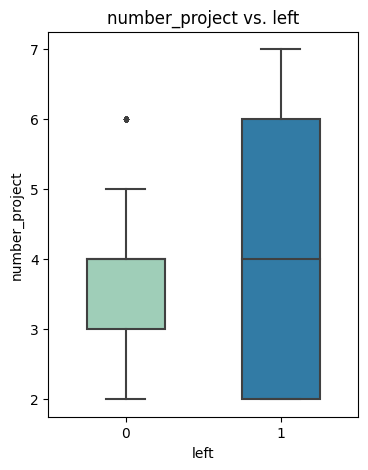

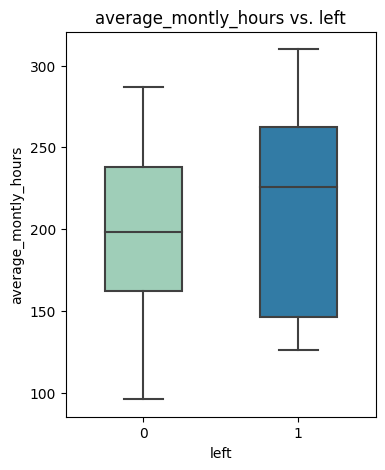

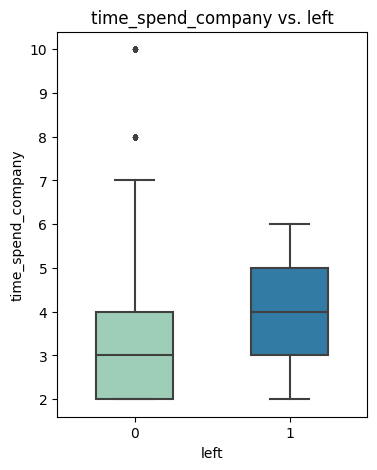

In [30]:
# store numerical columns names except target feature and categorical features
columns = list(df.select_dtypes(include='number').columns)

columns.remove('left') # binary
columns.remove('Work_accident') # binary
columns.remove('promotion_last_5years') #binary

for column in columns:
    plt.figure(figsize=(4, 5))
    sns.boxplot(data=df, width=0.5, fliersize=3, y=column, 
                x='left', palette = 'YlGnBu')
    plt.title(f'{column} vs. left')
    plt.show()
# No many outlier

In [ ]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','departments','salary']

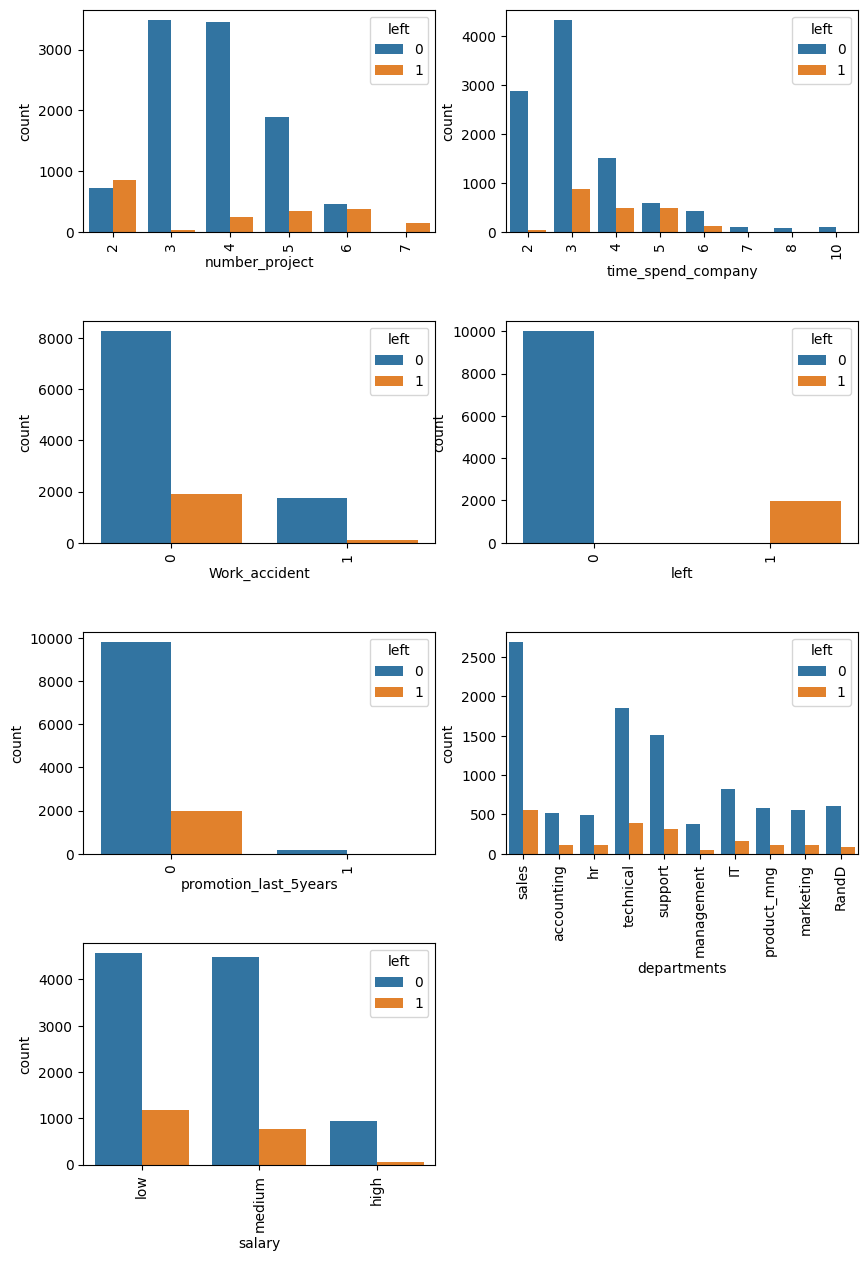

In [ ]:
# counf of fetures based on target

fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(df[features]):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.4)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)

In [31]:
df[df['time_spend_company'] > 7]['departments'].value_counts()

sales          53
management     43
support        19
marketing      16
technical      15
IT             13
accounting     12
product_mng     9
RandD           5
hr              3
Name: departments, dtype: int64

In [32]:
df[df['number_project'] > 5]['departments'].value_counts()

sales          262
technical      206
support        139
IT              73
product_mng     61
RandD           56
accounting      51
marketing       46
hr              44
management      33
Name: departments, dtype: int64

In [35]:
df[df['number_project'] == 7]["left"].value_counts()

1    145
Name: left, dtype: int64

all employees that had 7 project left the company

In [36]:
df[df['promotion_last_5years'] == 1]['left'].value_counts()

0    195
1      8
Name: left, dtype: int64

most employees that had promotion do not left

# Preprocessing of Data

## Feature Selection

In [125]:
df_sn = df[['satisfaction_level' , 'average_montly_hours']].copy()
df_sn.head()

,satisfaction_level,average_montly_hours
0,0.38,157
1,0.80,262
2,0.11,272
3,0.72,223
4,0.37,159


## 3. Cluster Analysis

### Kmeans

In [99]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

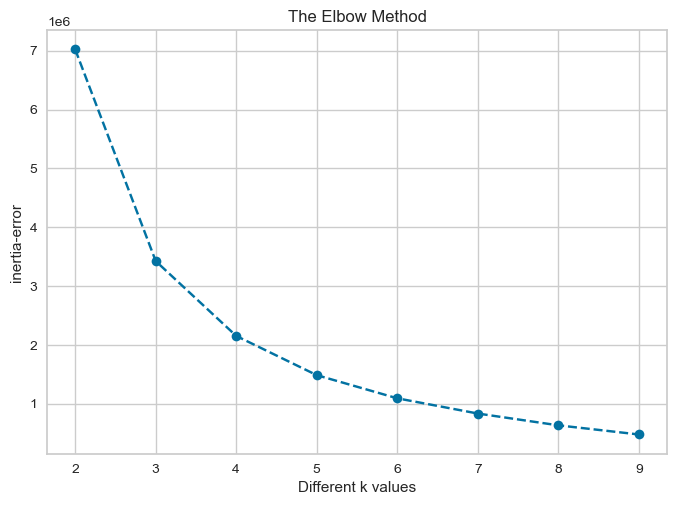

In [126]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df_sn)
    ssd.append(model.inertia_)
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("The Elbow Method");

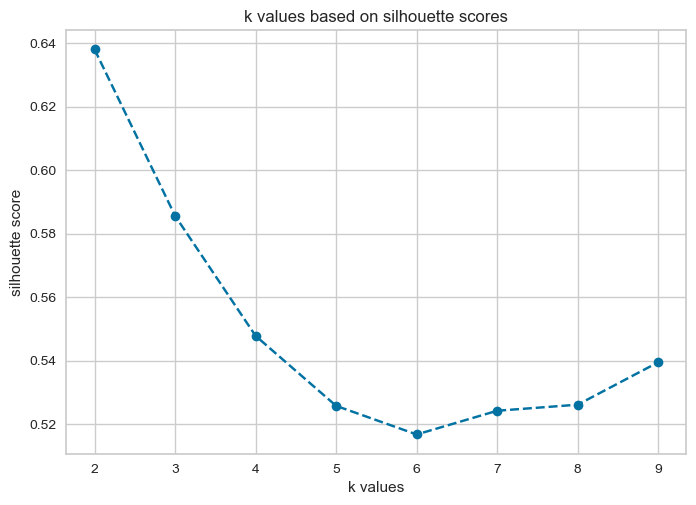

In [127]:

scores = []
for n in K:
    kmeans = KMeans(n_clusters = n, random_state = 42)
    kmeans.fit(df_sn)
    cluster_labels = kmeans.labels_
        # silhouette score
    silhouette_avg = silhouette_score(df_sn, cluster_labels)
    scores.append(silhouette_avg)
plt.plot(K, scores, 'bo--')
plt.xlabel('k values')
plt.ylabel('silhouette score')
plt.title('k values based on silhouette scores');

In [128]:
kmeans_model = KMeans(n_clusters = 3, random_state=42)
kmeans_model.fit_predict(df_sn)

array([0, 1, 1, ..., 2, 0, 2])

In [129]:
clusters = kmeans_model.labels_

In [130]:
km_df = df_sn.copy()
km_df["Kmeans_clusters"] = clusters
km_df.head()

,satisfaction_level,average_montly_hours,Kmeans_clusters
0,0.38,157,0
1,0.80,262,1
2,0.11,272,1
3,0.72,223,2
4,0.37,159,0


In [131]:
km_df["Kmeans_clusters"].value_counts()

0    4228
1    3978
2    3785
Name: Kmeans_clusters, dtype: int64

In [132]:
centers = kmeans_model.cluster_centers_
centers

array([[  0.60273179, 146.3807947 ],
       [  0.61537959, 256.90447461],
       [  0.6747424 , 201.58890357]])

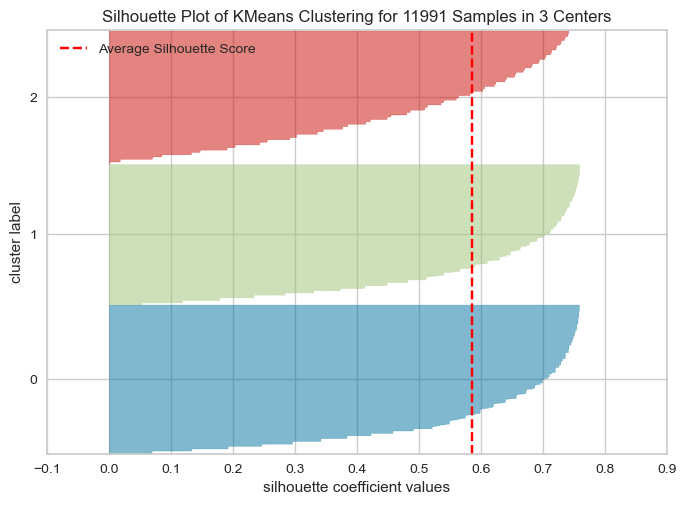

In [133]:
visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick')
visualizer.fit(df_sn)    
visualizer.show(); 

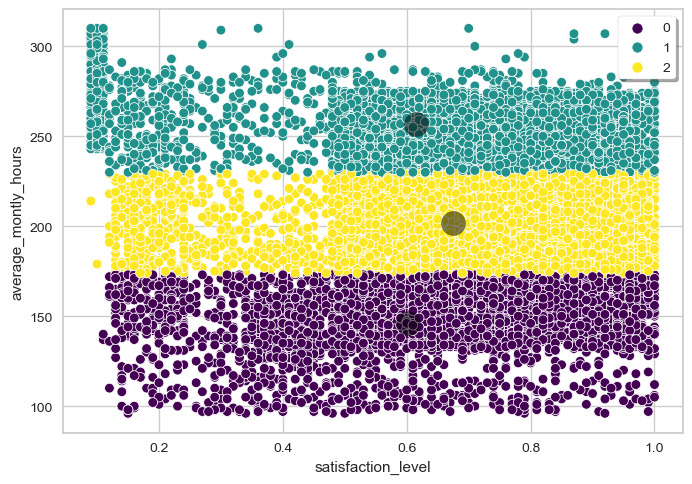

In [140]:
sns.scatterplot(x="satisfaction_level",
            y="average_montly_hours",
            data =km_df,
            hue="Kmeans_clusters",
            palette='viridis')

plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)
plt.legend(loc='best' ,frameon=True ,shadow=True)

## AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(df_sn)

## 4. Predictive Model Building

### Preprocessing

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

#### Model Building

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

####  Prediction

## 5. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___